In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('image', cmap='gray')

# Nhận dạng cạnh và áp dụng Filter

# 2D convolution

* Convolution (tích chập) là một phép toán giúp thay đổi giá trị của một pixel.
* Cách hoạt động: tính tổng tích giá trị của pixel với với kernel (một ma trận có tâm là pixel đang xét)
* Tùy vào giá trị của kernel mà kết quả ảnh được làm mờ, hiện các cạnh, ...
* filter2D giúp áp dụng kernel lên ảnh. Hàm nhận vào ảnh, kích thước cần, kernel.

# Làm mờ ảnh (blurring)
* Cách hoạt động: tính trung bình giá trị các pixels trong một vùng
* Tên gọi khác: low pass filter
* Low pass filter lọc phần ảnh có tần số cao (độ thay đổi giá trị pixels lớn)
* Ví dụ: khu vực các cạnh sẽ có tần số cao nên low pass filter sẽ làm mềm các cạnh.
* Kích thước kernel càng lớn thì ảnh càng mờ (tính trung bình trên khu vực rộng)
* Ví dụ box blur kernel:
$$L=\frac{1}{9}\left[\begin{array}{lll}{1} & {1} & {1} \\ {1} & {1} & {1} \\ {1} & {1} & {1}\end{array}\right]$$

* Ví dụ gaussian kernel:
$$\frac{1}{256}\left[\begin{array}{ccccc}{1} & {4} & {6} & {4} & {1} \\ {4} & {16} & {24} & {16} & {4} \\ {6} & {24} & {36} & {24} & {6} \\ {4} & {16} & {24} & {16} & {4} \\ {1} & {4} & {6} & {4} & {1}\end{array}\right]$$

https://www.codingame.com/playgrounds/2524/basic-image-manipulation/filtering

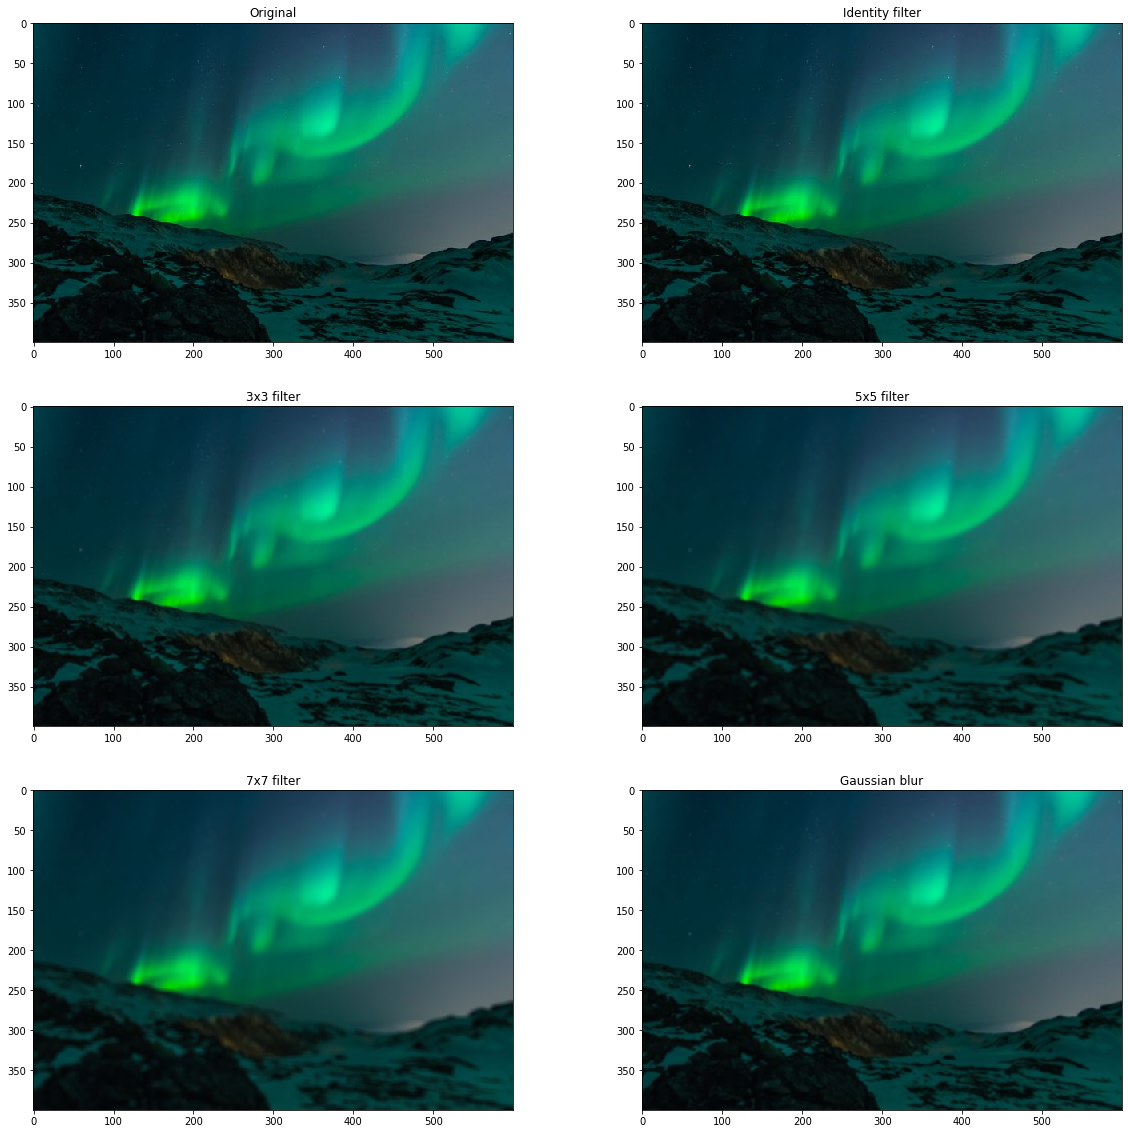

In [41]:
img = cv2.imread('images/input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

rows, cols = img.shape[:2]
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])

kernel_3x3 = np.ones((3,3), np.float32) / 9.0 # Divide by 9 to normalize
kernel_5x5 = np.ones((5,5), np.float32) / 25.0 # Divide by 25 to normalize
gaussian_kernel = np.array([[1, 4 ,  6,  4, 1],
                            [4, 16, 24, 16, 4],
                            [6, 24, 36, 24, 6],
                            [4, 16, 24, 16, 4],
                            [1, 4 ,  6,  4, 1]]) / 256.0

fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax[0,0].imshow(img)
ax[0,0].set_title('Original')

output_1 = cv2.filter2D(img, -1, kernel_identity) # value -1 is to maintain source image depth
ax[0,1].imshow(output_1)
ax[0,1].set_title('Identity filter')

output_2 = cv2.filter2D(img, -1, kernel_3x3)
ax[1,0].imshow(output_2)
ax[1,0].set_title('3x3 filter')

output_3 = cv2.filter2D(img, -1, kernel_5x5)
ax[1,1].imshow(output_3)
ax[1,1].set_title('5x5 filter')

output_4 = cv2.blur(img, (7,7))
ax[2,0].imshow(output_4)
ax[2,0].set_title('7x7 filter')

output_5 = cv2.filter2D(img, -1, gaussian_kernel)
ax[2,1].imshow(output_5)
ax[2,1].set_title('Gaussian blur')

plt.show()

# Motion blur

* Làm mờ có hướng
* Cách làm: lấy trung bình trên một hướng xác định
* Ví dụ kernel:

$$M=\left[\begin{array}{lll}{0} & {0} & {0} \\ {1} & {1} & {1} \\ {0} & {0} & {0}\end{array}\right]$$

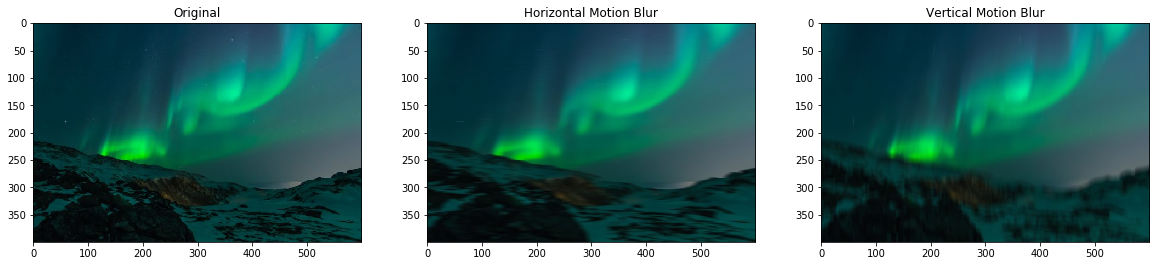

In [42]:
size = 15

# horizontal blur
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[int((size-1)/2), :] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
output = cv2.filter2D(img, -1, kernel_motion_blur)

# vertical blur
kernel_motion_blur = np.zeros((size, size))
kernel_motion_blur[:, int((size-1)/2)] = np.ones(size)
kernel_motion_blur = kernel_motion_blur / size
output_2 = cv2.filter2D(img, -1, kernel_motion_blur)

fig, ax = plt.subplots(1, 3, figsize=(20,15))

ax[0].imshow(img)
ax[0].set_title('Original')

ax[1].imshow(output)
ax[1].set_title('Horizontal Motion Blur')

ax[2].imshow(output_2)
ax[2].set_title('Vertical Motion Blur')

plt.show()

# Sharpening

* Ngược lại với làm mờ, sharpening (high pass filter) làm tăng độ thay đổi giá trị của pixels (tần số)
* Sharpening đồng thời cũng làm tăng nhiễu nên cần lọc nhiễu trước.
* Sharpening làm mất dữ liệu nên không hoàn toàn quay ngược lại được.
* Edge enhancement ít làm đậm các chi tiết nhỏ hơn so với sharpening nhờ sử dụng gaussian kernel.

https://diffractionlimited.com/help/maximdl/High-Pass_Filtering.htm

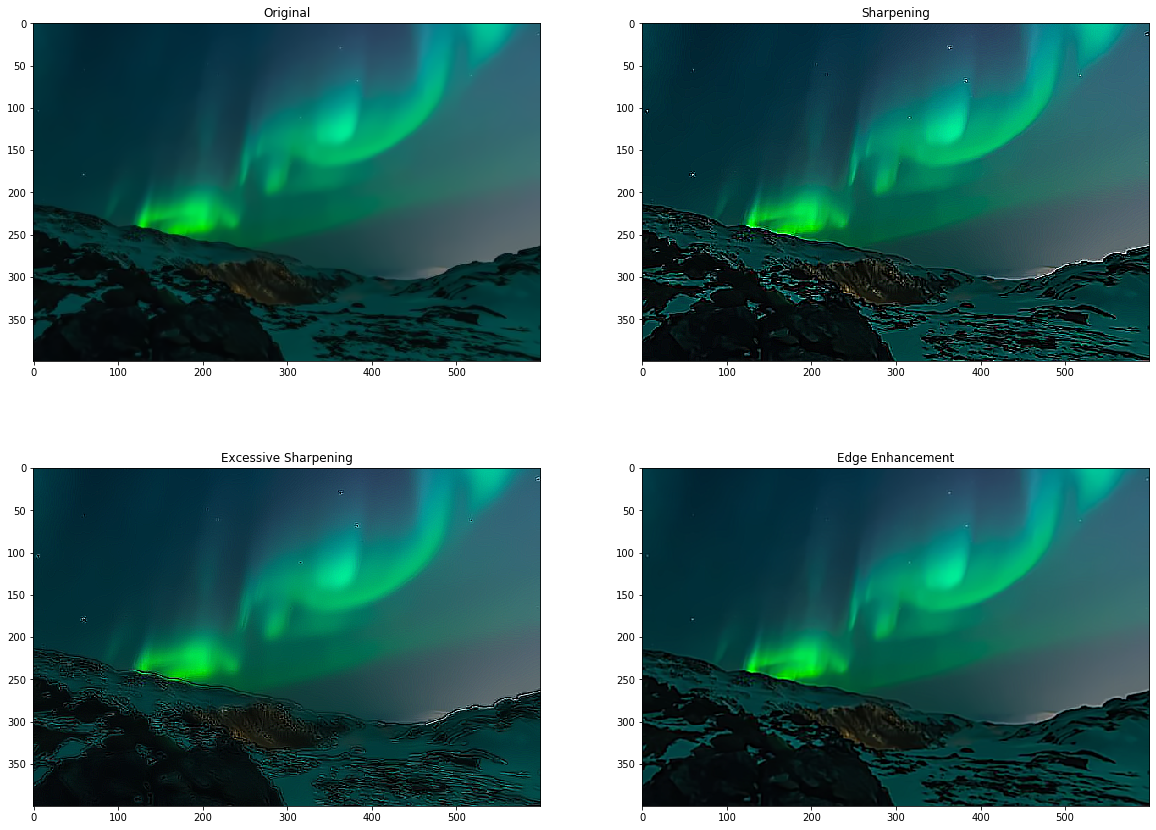

In [43]:
# generating the kernels
kernel_sharpen_1 = np.array([[-1,-1,-1], 
                             [-1, 9,-1], 
                             [-1,-1,-1]])
kernel_sharpen_2 = np.array([[ 1, 1, 1], 
                             [ 1,-7, 1], 
                             [ 1, 1, 1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1, 2, 2, 2,-1],
                             [-1, 2, 8, 2,-1],
                             [-1, 2, 2, 2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0

# applying different kernels to the input image
img = cv2.fastNlMeansDenoising(img)
output_1 = cv2.filter2D(img, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(img, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(img, -1, kernel_sharpen_3)

fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].imshow(img)     ; ax[0,0].set_title('Original')
ax[0,1].imshow(output_1); ax[0,1].set_title('Sharpening')
ax[1,0].imshow(output_2); ax[1,0].set_title('Excessive Sharpening')
ax[1,1].imshow(output_3); ax[1,1].set_title('Edge Enhancement')

plt.show()

# Embossing - làm nổi chi tiết

* Cách làm: làm nổi các cạnh theo hướng của kernel (highlight), các pixels còn lại có giá trị thấp tới 0 (shadow).
* Có thể scale lên (ví dụ là 128 - 256) để hiện rõ phần tối (shadow)

https://en.wikipedia.org/wiki/Image_embossing

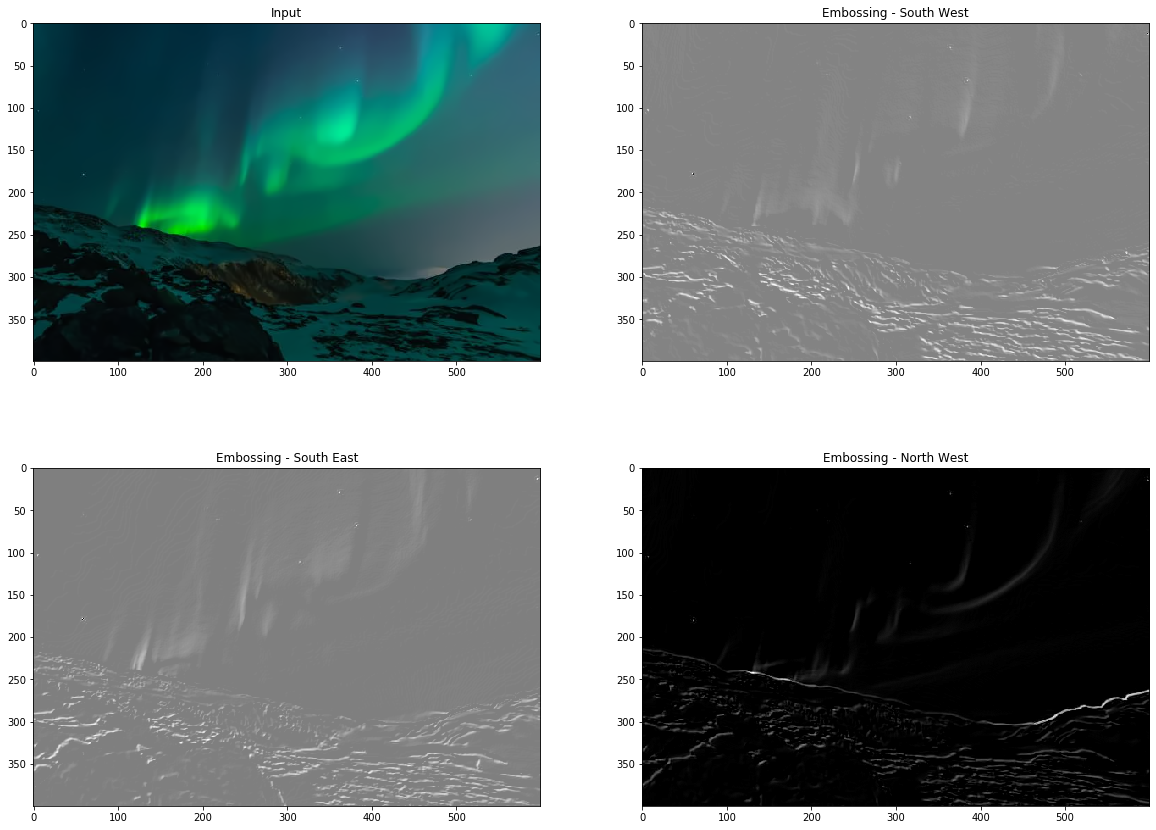

In [44]:
img_emboss_input = img

# generating the kernels
kernel_emboss_1 = np.array([[ 0,-1,-1],
                            [ 1, 0,-1],
                            [ 1, 1,0]])
kernel_emboss_2 = np.array([[-1,-1, 0],
                            [-1, 0, 1],
                            [ 0, 1, 1]])
kernel_emboss_3 = np.array([[ 1, 0, 0],
                            [ 0, 0, 0],
                            [ 0, 0,-1]])

# converting the image to grayscale
gray_img = cv2.cvtColor(img_emboss_input,cv2.COLOR_BGR2GRAY)

# applying the kernels to the grayscale image and adding the offset to produce the shadow
output_1 = cv2.filter2D(gray_img, -1, kernel_emboss_1) + 128
output_2 = cv2.filter2D(gray_img, -1, kernel_emboss_2) + 128
output_3 = cv2.filter2D(gray_img, -1, kernel_emboss_3) + 128

fig, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].imshow(img_emboss_input); ax[0,0].set_title('Input')
ax[0,1].imshow(output_1)        ; ax[0,1].set_title('Embossing - South West')
ax[1,0].imshow(output_2)        ; ax[1,0].set_title('Embossing - South East')
ax[1,1].imshow(output_3)        ; ax[1,1].set_title('Embossing - North West')

plt.show()

# Phát hiện cạnh (Edge detection)

* Tương tự như high pass filter, edge detection sử dụng kernel lọc các vùng có sự thay đổi giá trị đột ngột nhưng áp dụng theo chiều của cạnh.
* Phổ biến là sobel kernel (dọc hoặc ngang)

$$\mathrm{S}_{\mathrm{x}}=\left[\begin{array}{ccc}{-1} & {0} & {1} \\ {-2} & {0} & {2} \\ {-1} & {0} & {1}\end{array}\right] \quad \mathrm{S}_{\mathrm{y}}=\left[\begin{array}{ccc}{-1} & {-2} & {-1} \\ {0} & {0} & {0} \\ {1} & {2} & {1}\end{array}\right]$$

* Laplacian kernel

$$\begin{array}{|c|c|c|}\hline 0 & {-1} & {0} \\ \hline-1 & {4} & {-1} \\ \hline 0 & {-1} & {0} \\ \hline\end{array}
\begin{array}{|c|c|c|}\hline-1 & {-1} & {-1} \\ \hline-1 & {8} & {-1} \\ \hline-1 & {-1} & {-1} \\ \hline\end{array}$$

* Canny edge detector:
    1. Dùng Gaussian filter để giảm nhiễu
    2. Tìm intensity gradient (dốc độ sáng) của ảnh
    3. Dùng non-maximum suppression cắt các cạnh xuống một đường duy nhất.
    4. Lọc hai cận theo gradient (độ dốc) tìm cạnh (bỏ các cạnh có độ dốc thấp)
    5. Bỏ các cạnh yếu và không nối với các cạnh mạnh.

http://aishack.in/tutorials/sobel-laplacian-edge-detectors/ \
https://en.wikipedia.org/wiki/Canny_edge_detector

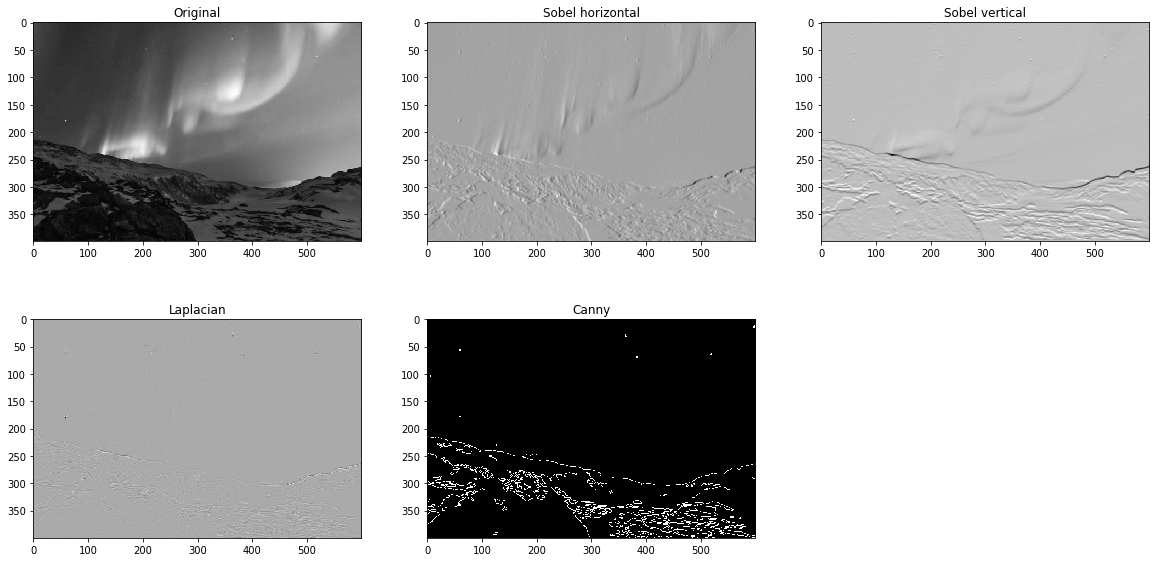

In [45]:
img = cv2.imread('images/input.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

# It is used depth of cv2.CV_64F.
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)

# Kernel size can be: 1,3,5 or 7.
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
canny = cv2.Canny(img, 50, 150)

fig, ax = plt.subplots(2, 3, figsize=(20, 10))

ax[0, 0].imshow(img); ax[0, 0].set_title('Original')
ax[0, 1].imshow(sobel_horizontal); ax[0, 1].set_title('Sobel horizontal')
ax[0, 2].imshow(sobel_vertical); ax[0, 2].set_title('Sobel vertical')
ax[1, 0].imshow(laplacian); ax[1, 0].set_title('Laplacian')
ax[1, 1].imshow(canny); ax[1, 1].set_title('Canny')
ax[1, 2].set_visible(False)
plt.show()

# Erosion and dilation
* Erosion: làm co các khối trong ảnh
* Dilation: làm dày các khối trong ảnh

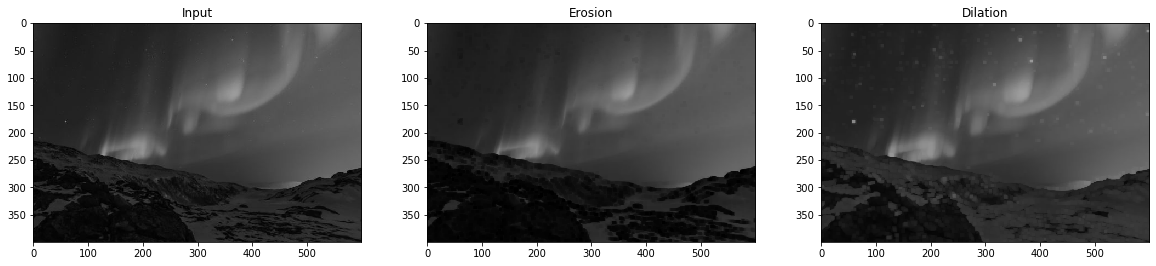

In [46]:
img = cv2.imread('images/input.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)

fig, ax = plt.subplots(1, 3, figsize=(20,10))

ax[0].imshow(img); ax[0].set_title('Input')
ax[1].imshow(img_erosion); ax[1].set_title('Erosion')
ax[2].imshow(img_dilation); ax[2].set_title('Dilation')
plt.show()

# Vignette filter

* Giảm độ sáng dần đến tâm ảnh.

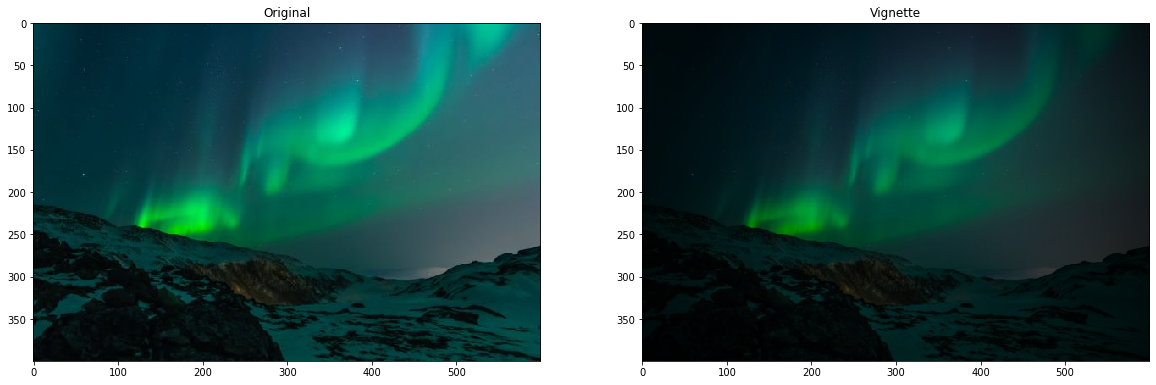

In [47]:
img = cv2.imread('images/input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols = img.shape[:2]

# generating vignette mask using Gaussian kernels
kernel_x = cv2.getGaussianKernel(cols,200)
kernel_y = cv2.getGaussianKernel(rows,200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
output = np.copy(img)

# applying the mask to each channel in the input image
for i in range(3):
    output[:,:,i] = output[:,:,i] * mask

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
ax[0].imshow(img); ax[0].set_title('Original')
ax[1].imshow(output); ax[1].set_title('Vignette')
plt.show()

# Tăng độ tương phản (image contrast)

* Cách làm: normalize giá trị pixels của ảnh lên cả khoảng giá trị 0-255
* Đối với ảnh màu: normalize giá trị độ sáng của ảnh (intensity), có thể đổi colors space sang YUV có tách biệt giá trị intensity
* equalizeHist nhận vào 1 channel và trả về phân bố mới trải dài trên khoảng giá trị 0-255

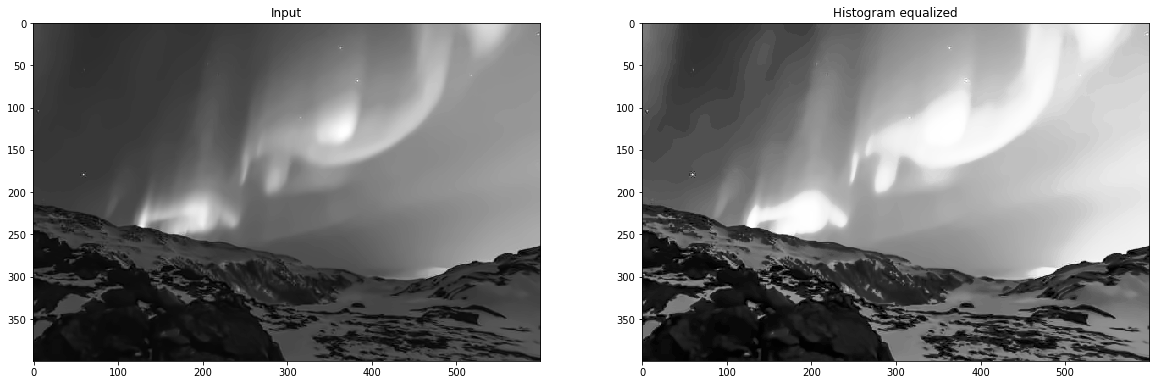

In [48]:
img = cv2.imread('images/input.jpg', 0)
img = cv2.fastNlMeansDenoising(img)

# equalize the histogram of the input image
histeq = cv2.equalizeHist(img)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
ax[0].imshow(img); ax[0].set_title('Input')
ax[1].imshow(histeq); ax[1].set_title('Histogram equalized')
plt.show()

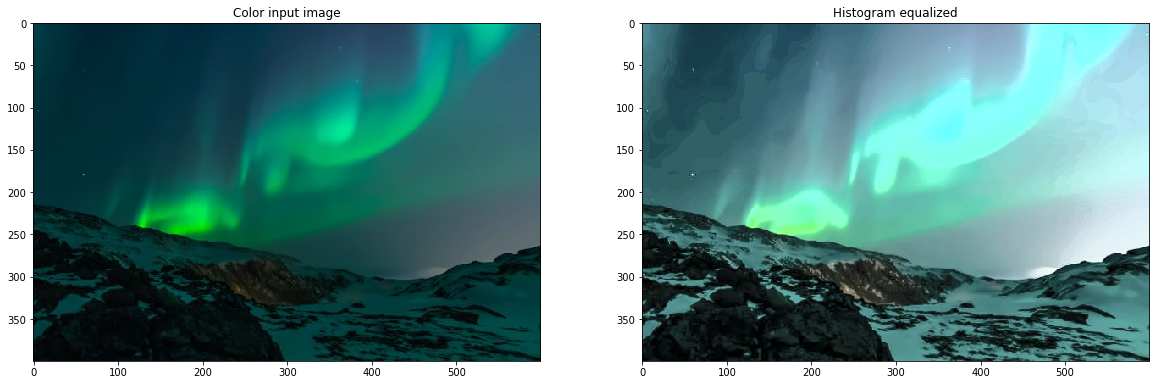

In [49]:
img = cv2.imread('images/input.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.fastNlMeansDenoisingColored(img)

img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
ax[0].imshow(img); ax[0].set_title('Color input image')
ax[1].imshow(img_output); ax[1].set_title('Histogram equalized')
plt.show()